In [4]:
# 匯入所需的程式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

   University Rank                                 Name of University  \
15              16                                Tsinghua University   
16              17                                  Peking University   
18              19                   National University of Singapore   
29              30                     Technical University of Munich   
30              31                            University of Hong Kong   
32              33                                         LMU Munich   
41              42                                          KU Leuven   
42              43                             Universität Heidelberg   
44              45                    Chinese University of Hong Kong   
45              46                                  McGill University   
52              53                       The University of Queensland   
53              54                           University of Manchester   
57              58  The Hong Kong University of Sci

<ipython-input-5-4e14dd62a993>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100.loc[:, 'OverAll Score'] = top_100['OverAll Score'].astype(float)
<ipython-input-5-4e14dd62a993>:64: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  top_100.loc[:, 'OverAll Score'] = top_100['OverAll Score'].astype(float)


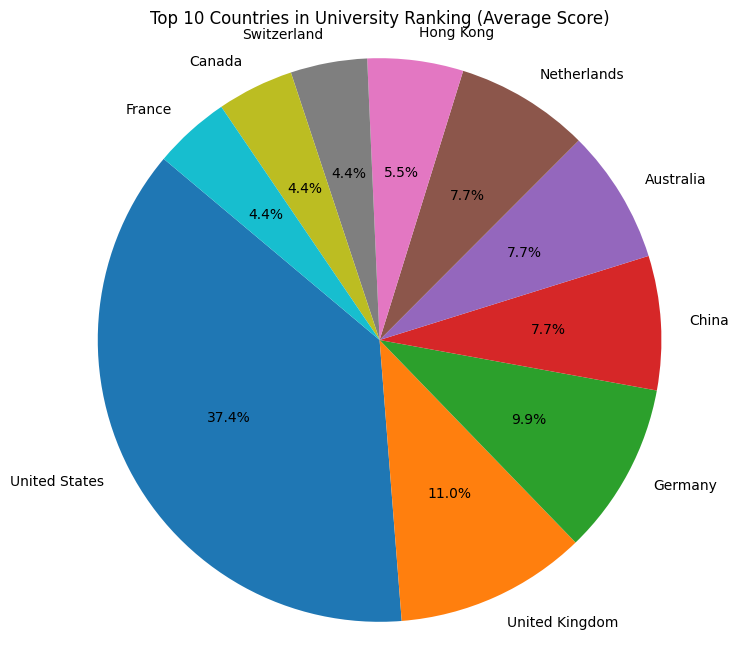

In [5]:
# 讀取名為 'World University Rankings 2023.csv' 的數據集
university= pd.read_csv('World University Rankings 2023.csv')

# 顯示數據集的前幾行以檢查數據
university.head()

# 移除重複的數據行
university.drop_duplicates(inplace=True)

# 從前100名大學中獲取前十個具有最多大學的國家
top_100 = university.head(100)
countries = top_100['Location']

# 找到 'Location' 欄位中具有空值的行
null_locations = top_100[top_100['Location'].isnull()]

# 顯示具有空值的行
print(null_locations)

# 填充缺失的國家數據
universities_to_countries = {
    'Tsinghua University': 'China',
    'Peking University': 'China',
    'National University of Singapore': 'Singapore',
    'Technical University of Munich': 'Germany',
    'University of Hong Kong': 'Hong Kong',
    'LMU Munich': 'Germany',
    'KU Leuven': 'Belgium',
    'Universität Heidelberg': 'Germany',
    'Chinese University of Hong Kong': 'Hong Kong',
    'McGill University': 'Canada',
    'The University of Queensland': 'Australia',
    'University of Manchester': 'United Kingdom',
    'The Hong Kong University of Science and Technology': 'Hong Kong',
    'Zhejiang University': 'China',
    'UNSW Sydney': 'Australia',
    'University of Science and Technology of China': 'China',
    'University of Groningen': 'Netherlands',
    'University of Bristol': 'United Kingdom',
    'Leiden University': 'Netherlands',
    'Yonsei University (Seoul campus)': 'South Korea',
    'Hong Kong Polytechnic University': 'Hong Kong',
    'Erasmus University Rotterdam': 'Netherlands',
    'University of Glasgow': 'United Kingdom',
    'McMaster University': 'Canada',
    'University of Adelaide': 'Australia',
    'City University of Hong Kong': 'Hong Kong'
}

# 遍歷大學並分配相應的國家
for university_name, country in universities_to_countries.items():
    top_100.loc[top_100['Name of University'] == university_name, 'Location'] = country

# 計算每個國家中的大學數量
country_counts = countries.value_counts()

# 獲取前十個國家
top_ten_countries = country_counts.head(10)

# 顯示前十個國家的大學數量
print(top_ten_countries)

# 將 'OverAll Score' 欄位轉換為浮點數
top_100.loc[:, 'OverAll Score'] = top_100['OverAll Score'].astype(float)

# 創建圓餅圖
plt.figure(num=1, figsize=(8, 8))
plt.pie(top_ten_countries, labels=top_ten_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries in University Ranking (Average Score)')
plt.axis('equal')

# 顯示圓餅圖
plt.show()

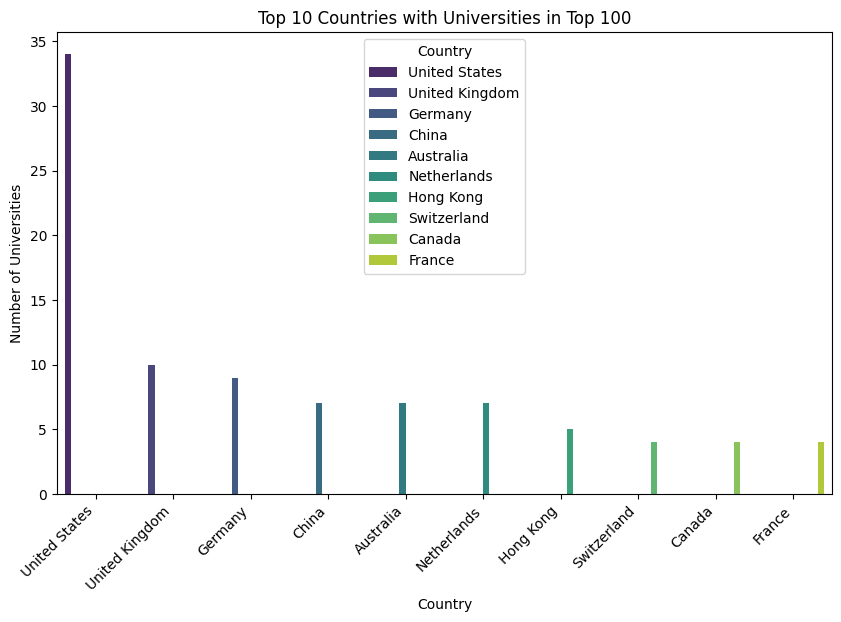

In [7]:
# 創建包含前十個國家和其大學數量的長條圖
top_ten_countries_df = top_ten_countries.reset_index()

# 重新命名列名
top_ten_countries_df.columns = ['Country', 'University Count']

# 創建長條圖
plt.figure(num=2, figsize=(10, 6))
bar_chart = sns.barplot(x='Country', y='University Count', data=top_ten_countries_df, hue='Country', palette='viridis')
bar_chart.set_title('Top 10 Countries with Universities in Top 100')
bar_chart.set_xlabel('Country')
bar_chart.set_ylabel('Number of Universities')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-8-b4c5c03ff1e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_universities['Rank'] = range(1, 11)


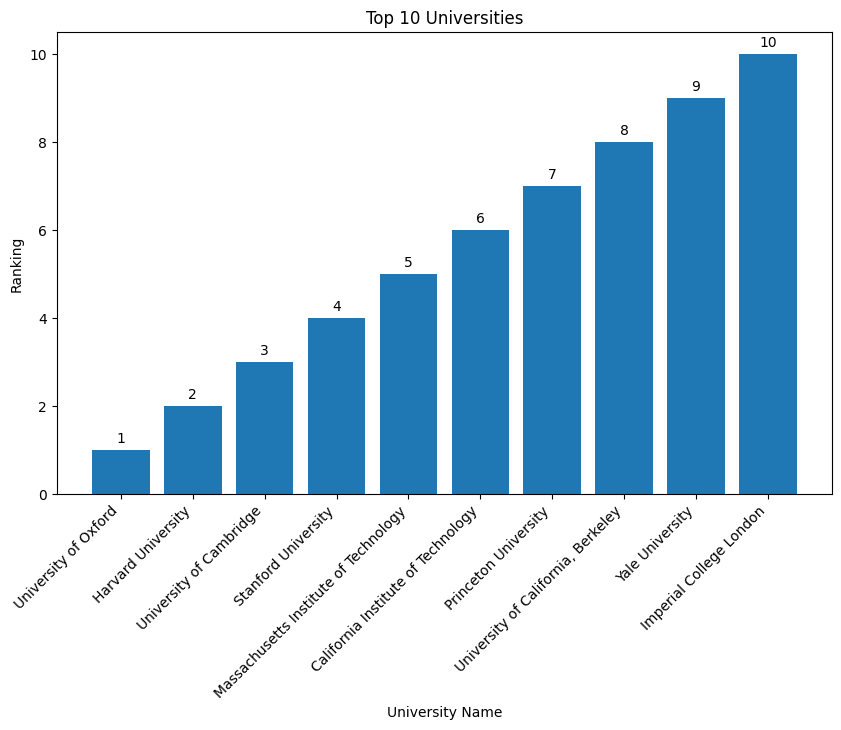

In [8]:
# 列印出前十名的學校，編號從1開始
top_10_universities = top_100.head(10)
# 添加編號列
top_10_universities['Rank'] = range(1, 11)
# 創建長條圖
plt.figure(num=3, figsize=(10, 6))
bar_chart = plt.bar(top_10_universities['Name of University'], top_10_universities['Rank'])
plt.title('Top 10 Universities')
plt.xlabel('University Name')
plt.ylabel('Ranking')
plt.xticks(rotation=45, ha='right')

# 添加標籤
for bar in bar_chart:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.show()

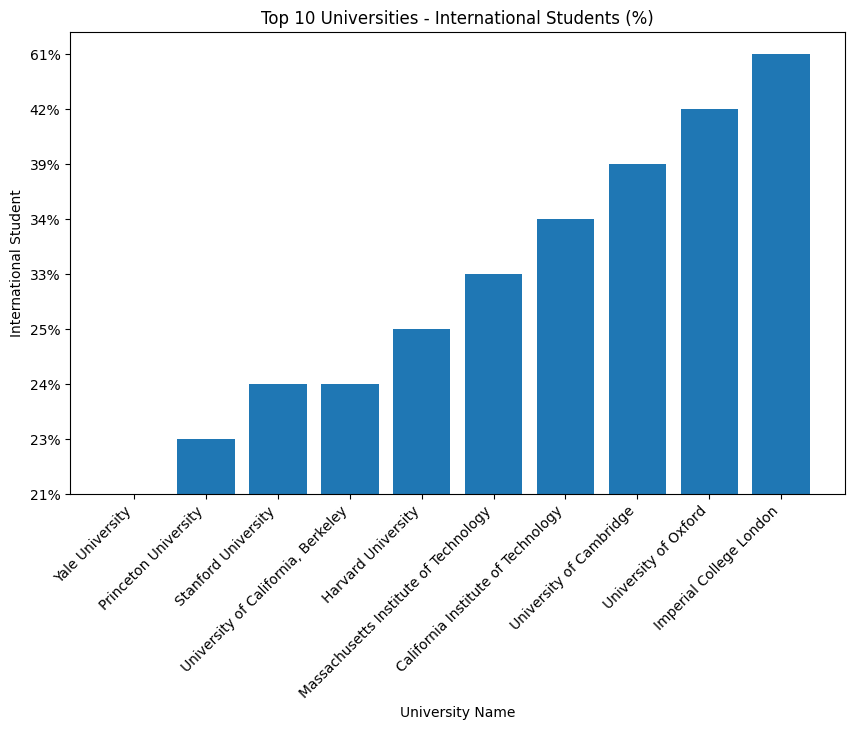

In [9]:
# 按國際學生比例排序
top_10_universities = top_10_universities.sort_values(by='International Student')

# 創建長條圖
plt.figure(num=4, figsize=(10, 6))
bar_chart = plt.bar(top_10_universities['Name of University'], top_10_universities['International Student'])
plt.title('Top 10 Universities - International Students (%)')
plt.xlabel('University Name')
plt.ylabel('International Student')
plt.xticks(rotation=45, ha='right')
plt.show()


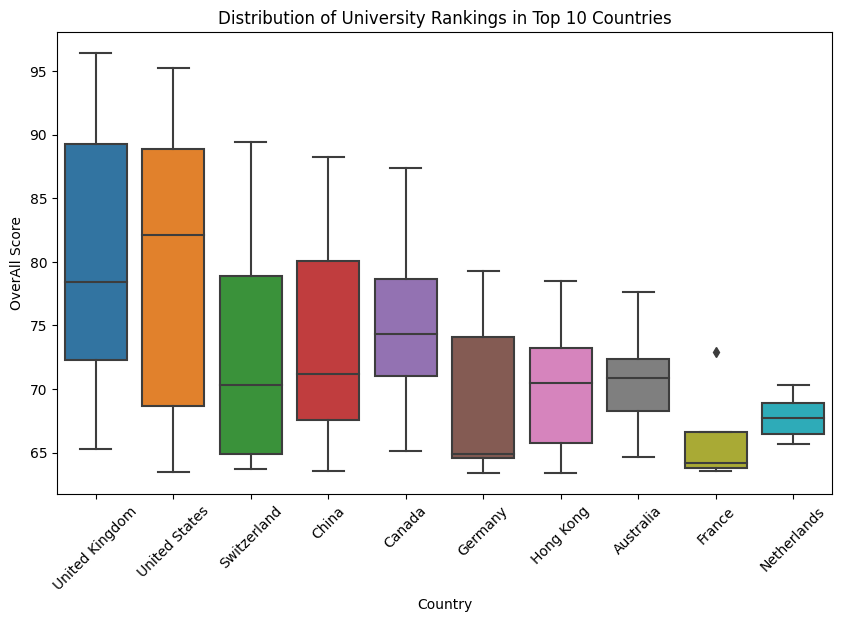

In [10]:
# 篩選數據以包含僅前十個國家
filtered_data = top_100[top_100['Location'].isin(top_ten_countries.index)]

# 創建分佈圖
plt.figure(num=5, figsize=(10, 6))
sns.boxplot(x='Location', y='OverAll Score', data=filtered_data)
plt.title('Distribution of University Rankings in Top 10 Countries')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('OverAll Score')
plt.show()

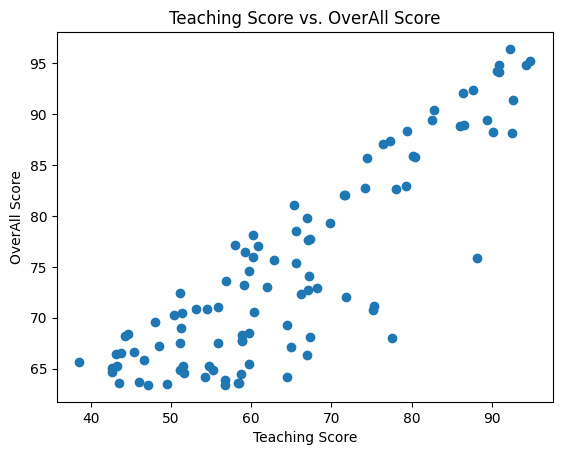

In [11]:
# 散點圖顯示 "Teaching Score" 與 "OverAll Score" 之間的關係
plt.figure(num=6)
plt.scatter(top_100['Teaching Score'], top_100['OverAll Score'])
plt.title('Teaching Score vs. OverAll Score')
plt.xlabel('Teaching Score')
plt.ylabel('OverAll Score')
plt.show()

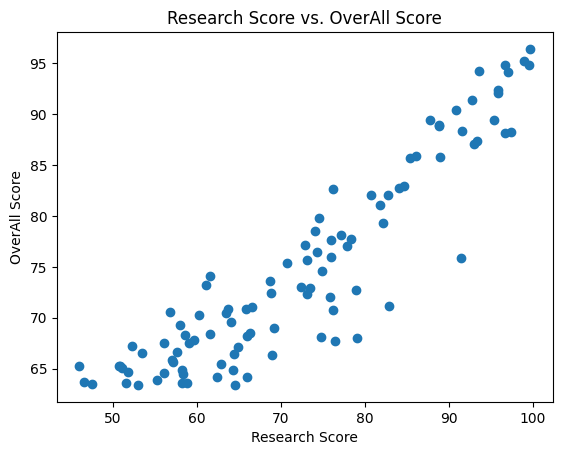

In [12]:
# 散點圖顯示 "Research Score" 與 "OverAll Score" 之間的關係
plt.figure(num=7)
plt.scatter(top_100['Research Score'], top_100['OverAll Score'])
plt.title('Research Score vs. OverAll Score')
plt.xlabel('Research Score')
plt.ylabel('OverAll Score')
plt.show()

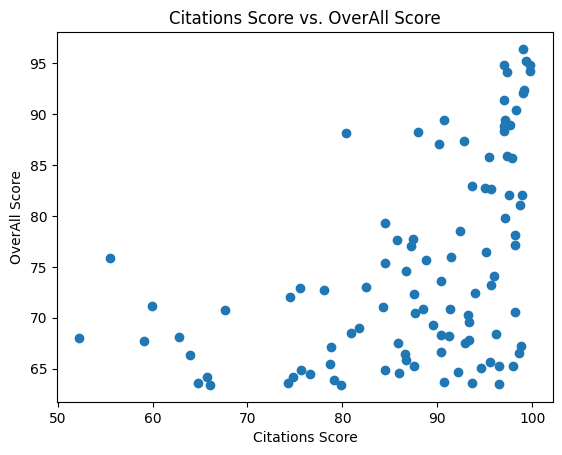

In [13]:
# 散點圖顯示 "Citations Score" 與 "OverAll Score" 之間的關係
plt.figure(num=8)
plt.scatter(top_100['Citations Score'], top_100['OverAll Score'])
plt.title('Citations Score vs. OverAll Score')
plt.xlabel('Citations Score')
plt.ylabel('OverAll Score')
plt.show()

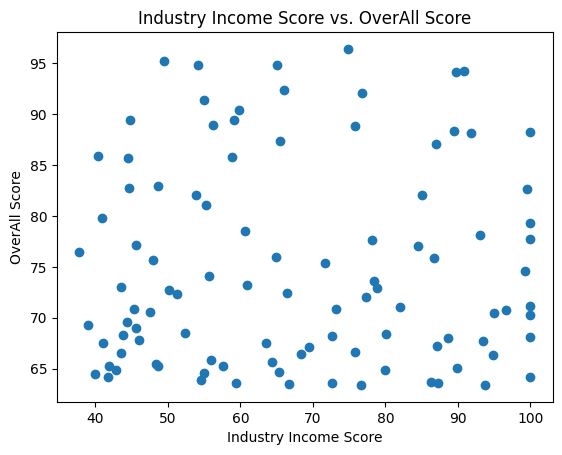

In [14]:
# 散點圖顯示 "Industry Income Score" 與 "OverAll Score" 之間的關係
plt.figure(num=9)
plt.scatter(top_100['Industry Income Score'], top_100['OverAll Score'])
plt.title('Industry Income Score vs. OverAll Score')
plt.xlabel('Industry Income Score')
plt.ylabel('OverAll Score')
plt.show()

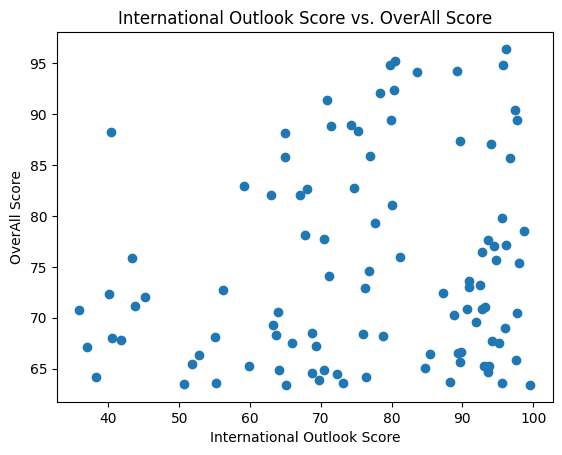

In [15]:
# 散點圖顯示 "International Outlook Score" 與 "OverAll Score" 之間的關係
plt.figure(num=10)
plt.scatter(top_100['International Outlook Score'], top_100['OverAll Score'])
plt.title('International Outlook Score vs. OverAll Score')
plt.xlabel('International Outlook Score')
plt.ylabel('OverAll Score')
plt.show()